<a href="https://colab.research.google.com/github/wira29/PCVK_Ganjil_2023/blob/main/28_WiradarmaNB_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Transformasi Linier Brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


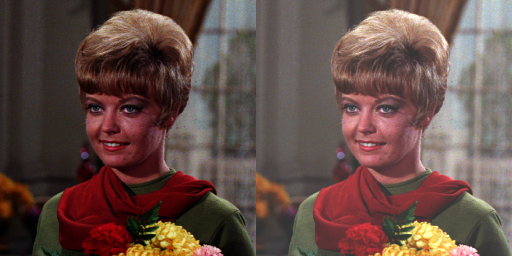

In [21]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print("Error, not a number")

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for lopp
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))

cv2_imshow(final_frame)


### Tugas

##### 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

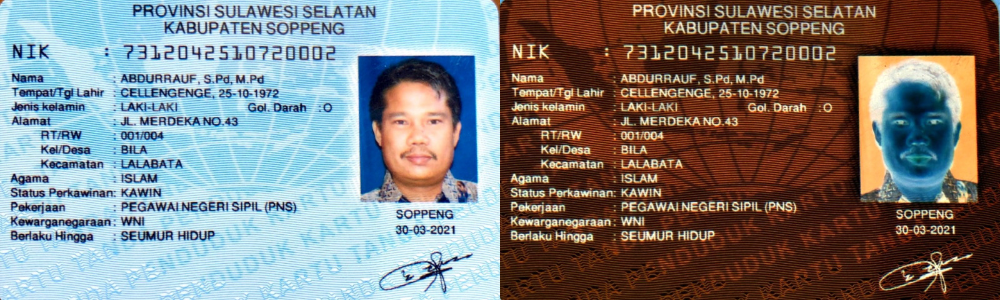

In [16]:
ktp = cv.resize(cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg'), (500, 300))
inverse_ktp = np.zeros(ktp.shape, ktp.dtype)

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    for c in range(ktp.shape[2]):
      inverse_ktp[y, x, c] = np.clip(255 - ktp[y,x,c], 0, 255)

final_frame = cv.hconcat((ktp, inverse_ktp))

cv2_imshow(final_frame)

##### 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2.3


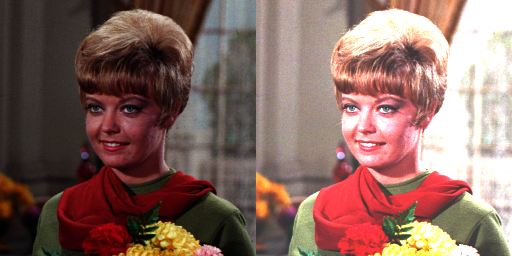

In [18]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print("Error, not a number")


original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
result_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      result_image[y, x, c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, result_image))

cv2_imshow(final_frame)

##### 3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


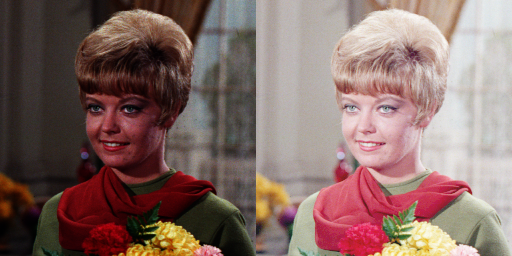

In [104]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print("Error, not a number")

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

const = 255 / np.log(1 + np.max(original))

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(const * np.log(1 + original[y,x,c]), 0, 255)

final_frame = cv.hconcat((original, brightness_image))

cv2_imshow(final_frame)

##### 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

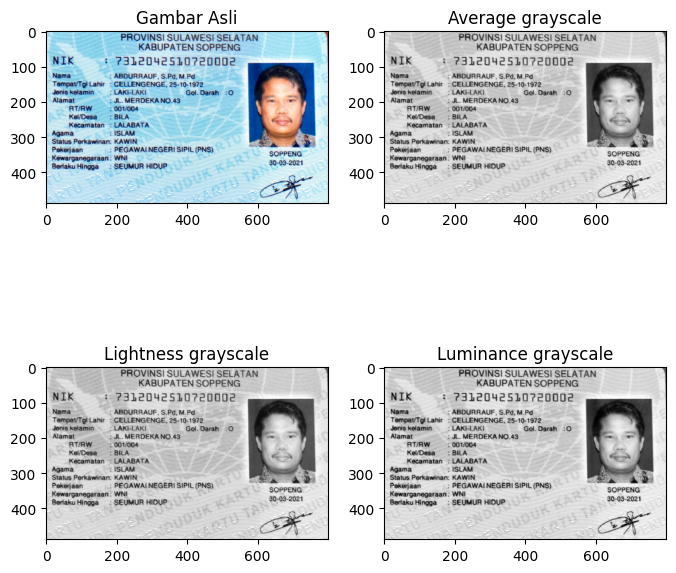

In [75]:
import matplotlib.pyplot as plt

ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

## grayscale average
avg = np.zeros(ktp.shape, ktp.dtype)

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
      avg[y, x] = sum(ktp[y, x]) / 3

## lightness image
lightness = np.zeros(ktp.shape, ktp.dtype)

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
      lightness[y, x] = int((int(max(ktp[y, x])) + int(min(ktp[y, x]))) / 2)

## luminance image
luminance = np.zeros(ktp.shape, ktp.dtype)
for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    luminance[y, x] = 0.21 * ktp[y,x,0] + 0.72 * ktp[y,x,1] + 0.07 * ktp[y,x,2]

fig, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].set_title("Gambar Asli")
ax[0,0].imshow(ktp)

ax[0,1].set_title("Average grayscale")
ax[0,1].imshow(avg)

ax[1,0].set_title("Lightness grayscale")
ax[1,0].imshow(lightness)

ax[1,1].set_title("Luminance grayscale")
ax[1,1].imshow(luminance)


##### 5.Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

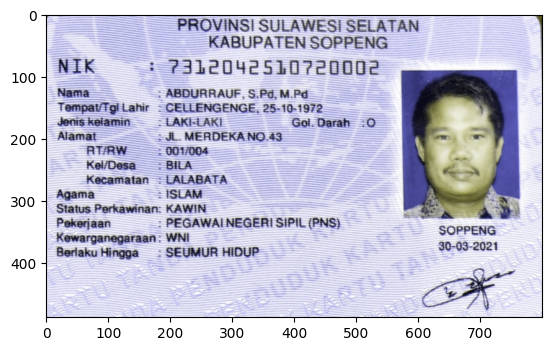

In [106]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg')
# ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

## grayscale average
avg = np.zeros(ktp_rgb.shape, ktp_rgb.dtype)

for y in range(ktp_rgb.shape[0]):
  for x in range(ktp_rgb.shape[1]):
      avg[y, x] = sum(ktp_rgb[y, x]) / 3

r0, g0, b0 = cv.split(avg)

b, g, r = cv.split(ktp)
grayscale_image = cv.cvtColor(ktp, cv.COLOR_RGB2GRAY)
merge = cv.merge((r0, g0, b))

plt.imshow(merge)